# **<center>Investigate Hotel Business Using Data Visualization📈</center>**

<center>

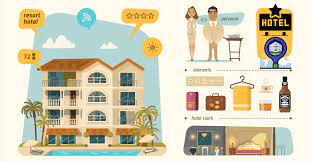

</center>


Explore the dynamic world of the hotel industry through the lens of data visualization. In this data science project, we delve into the vast troves of hotel booking data to uncover key insights and trends. From booking patterns and customer preferences to pricing strategies and seasonal fluctuations, we leverage the power of data visualization to present a comprehensive view of the hotel business landscape.

##Import Library
this is the library that we gonna need in this project.

In [ ]:
#import library
#for analyzing the data
import pandas as pd
import numpy as np

#for the diagram data
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for Pandas
pd.set_option('display.max_rows', 1000)     # Display all rows (remove the None to set a specific number)
pd.set_option('display.max_columns', 1000)  # Display all columns (remove the None to set a specific number)
pd.set_option('display.width', 100)        # Adjust the width of the display (None for auto)

import warnings
warnings.filterwarnings("ignore")

##Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti dengan path dataset Anda di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/hotel_bookings_data.csv'

# Baca dataset dengan pandas
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Understanding

In [ ]:
df.shape

(119390, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


**Column Summary**:
from 119390 values from the dataset, there is some columns we need to handle:

* `children`: This column has missing values that need to be addressed. Decisions must be made on how to handle these missing data points.

* `city`: Missing values are present in this column, potentially impacting geographic analysis and insights related to customer origin.

* `agent`: Many missing values are found in the 'agent' column. This could affect understanding the role of agents in bookings and requires imputation or other strategies.

* `company`: The 'company' column has numerous missing values, which may impact the analysis involving corporate clients or partnerships. Decisions should be made regarding the handling of these missing entries.

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique = len(unique_values)

    print(f"Column: =={column}==")

    if num_unique > 20:
        # If there are more than 20 unique values, print the first 20
        print(unique_values[:20])
        print(f"Total unique values: {num_unique}\n")
    else:
        # If there are 20 or fewer unique values, print all of them
        print(f"{unique_values}\n")

Column: ==hotel==
['Resort Hotel' 'City Hotel']

Column: ==is_canceled==
[0 1]

Column: ==lead_time==
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60]
Total unique values: 479

Column: ==arrival_date_year==
[2017 2018 2019]

Column: ==arrival_date_month==
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

Column: ==arrival_date_week_number==
[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Total unique values: 53

Column: ==arrival_date_day_of_month==
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Total unique values: 31

Column: ==stays_in_weekend_nights==
[ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]

Column: ==stays_in_weekdays_nights==
[ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13]
Total unique values: 35

Column: ==adults==
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]

Column: ==children==
[ 0.  1.  2. 10.  3. nan]

Column: ==babies==
[ 

##**Data Preprocessing**

### Handling missing values

In [ ]:
# The number of NULL entries in each column.
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

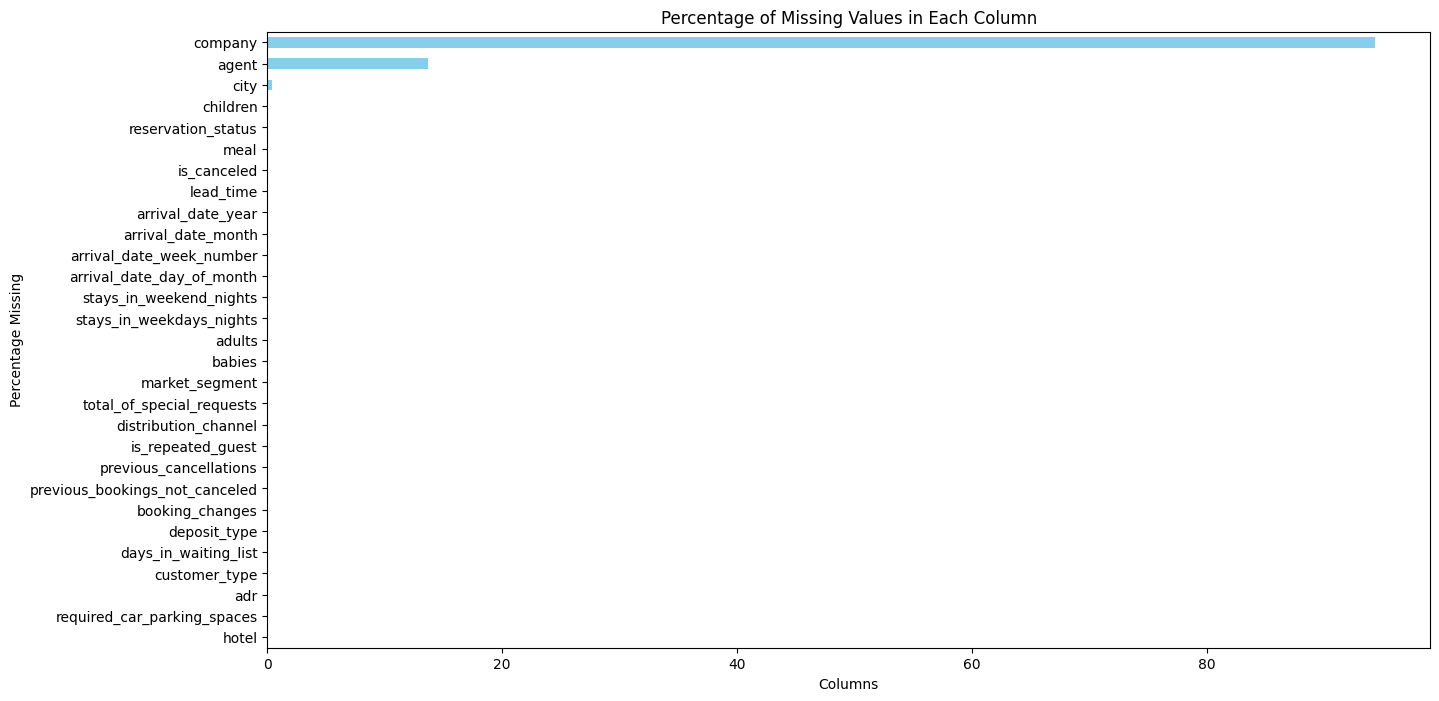

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Sort the columns by the percentage of missing values in descending order
missing_percentage = missing_percentage.sort_values(ascending=True)

# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(15, 8))
missing_percentage.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.show()


In [ ]:
missing_percentage.sort_values(ascending=False)

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
stays_in_weekdays_nights           0.000000
reservation_status                 0.000000
meal                               0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
hotel                              0.000000
required_car_parking_spaces        0.000000
babies                             0.000000
market_segment                     0.000000
total_of_special_requests          0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled  

In [ ]:
# Replace missing values in the 'company' column with 0, indicating no company involvement.
df['company'] = df['company'].fillna(0)

# Replace missing values in the 'agent' column with 0, indicating no agent involvement.
df['agent'] = df['agent'].fillna(0)

# Fill missing values in the 'children' column with 0, suggesting that the customer has no children.
df['children'] = df['children'].fillna(0)

# Replace missing values in the 'city' column with 'unknown' to indicate unavailable city information.
df['city'] = df['city'].fillna('unknown')

In [ ]:
# number of NULL entries after preprocessing

print('Total of the NULL data after preprocessing: \n')
df.isna().sum()

Total of the NULL data after preprocessing: 



hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

###Handling Duplicated Rows

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Get the number of duplicated rows
num_duplicates = len(duplicate_rows)

if num_duplicates > 0:
    # If duplicates are found, remove them
    df.drop_duplicates(inplace=True)
    print(f"Duplicate of {num_duplicates} rows has been removed! ")
else:
    # If no duplicates exist, print an informational message with emojis
    print("No duplicate rows found. Your data is clean and unique!")

Duplicate of 33261 rows has been removed! 


### Handling Incorrect Data Types

In [ ]:
#correcting the data types
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

#checking the data types
print('the data types after preprocessing: \n', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  meal                           

###Handling Incorret Values

In [ ]:
#handling the incorrect values
print(df['meal'].unique())

['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


In [ ]:
# Replacing the category 'Undefined' with 'No Meal'.
df['meal'] = df['meal'].replace(['Undefined'],'No Meal')

print('checking the data values after preprocessing: \n', df['meal'].unique())

checking the data values after preprocessing: 
 ['Breakfast' 'Full Board' 'Dinner' 'No Meal']


### Checking the dataset after Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86129 non-null  int64  
 11  babies                          86129 non-null  int64  
 12  meal                           

In [ ]:
print(df['meal'].unique())

['Breakfast' 'Full Board' 'Dinner' 'No Meal']


It can be concluded that from the dataset that has been cleaned above there has been a change to the dataset, namely with the total dataset from previously 119390 to 119210 due to cleaning the data on the total number of guests, as well as deleting the company column because the data availability which is only 6% is not enough to load the data and fill in the values. the column has children, the city column, and the eating column.

##Statistical analysis

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Display the shapes of the resulting DataFrames
print("Numerical Columns:")
print(numerical_columns.shape)
print("\nCategorical Columns:")
print(categorical_columns.shape)

Numerical Columns:
(86129, 20)

Categorical Columns:
(86129, 9)


## **Monthly Hotel Booking Analysis Based on Hotel Type**

###Calculates the number of hotel bookings each month based on hotel type

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0,0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out


In [ ]:
# Create a new DataFrame and perform the operations
agg_plot = df.assign(
    arrival_date_num_month=pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
).groupby(["hotel", "arrival_date_month", "arrival_date_num_month", "arrival_date_year"]) \
.agg({"hotel":"count"}) \
.rename(columns={"hotel": "total_booking"}) \
.reset_index() \
.sort_values(by=["hotel", "arrival_date_num_month", "arrival_date_year"]) \
.drop("arrival_date_num_month", axis=1) \
.set_index(["hotel", "arrival_date_month", "arrival_date_year"])

# Print the resulting DataFrame if needed
agg_plot

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                         763
                                2018                        2132
             February           2017                        1003
                                2018                        1980
             March              2018                        1013
                                2019                        1685
             April              2018                        1631
                                2019                        1929
             May                2018                        2356
                                2019                        2465
             June               2018                        2387
                                2019                        2648
             July               2018                        2302
                                2019                        3043
             August             2018                        2224
                                2019                        2703
             September          2017                         375
                                2018                        2466
                                2019                        2845
             October            2017                        1060
                                2018                        2790
                                2019                        2653
             November           2017                        1544
                                2018                        2519
             December           2017                        1457
                                2018                        2602
Resort Hotel January            2017                         848
                                2018                        1180
             February           2017                         950
                                2018                        1149
             March              2018                         815
                                2019                        1119
             April              2018                        1135
                                2019                        1340
             May                2018                        1442
                                2019                        1172
             June               2018                        1331
                                2019                        1445
             July               2018                        1403
                                2019                        1494
             August             2018                        1218
                                2019                        1512
             September          2017                        1275
                                2018                        1360
                                2019                        1665
             October            2017                        1344
                                2018                        1598
                                2019                        1705
             November           2017                        1135
                                2018                        1259
             December           2017                        1111
                                2018                        1549

In [ ]:
# Filter the DataFrame to include only "Check-Out" and "Canceled" reservation statuses
filtered_df = df[df['reservation_status'].isin(['Check-Out', 'Canceled'])]

# Perform the aggregation on the filtered data
monthly_hotels_filtered = filtered_df.groupby(['hotel', 'arrival_date_month']).agg({
    'arrival_date_year': 'nunique',
    'reservation_status': ['count', lambda x: (x == 'Canceled').sum()]
}).reset_index()

monthly_hotels_filtered.columns = ['Hotel Type', 'Arrival Month', 'Total Years', 'Total Reservations', 'Total Canceled']

# Add a new column for Total Booking
monthly_hotels_filtered['Total Booking'] = monthly_hotels_filtered['Total Reservations'] + monthly_hotels_filtered['Total Canceled']

monthly_hotels_filtered

,Hotel Type,Arrival Month,Total Years,Total Reservations,Total Canceled,Total Booking
0,City Hotel,April,2,3467,867,4334
1,City Hotel,August,2,4865,1444,6309
2,City Hotel,December,2,4016,1058,5074
3,City Hotel,February,2,2942,929,3871
4,City Hotel,January,2,2843,686,3529
5,City Hotel,July,2,5273,1652,6925
6,City Hotel,June,2,4974,1672,6646
7,City Hotel,March,2,2648,706,3354
8,City Hotel,May,2,4739,1272,6011
9,City Hotel,November,2,4015,988,5003


after all of this aggregration we gonna step ahead into normalize the data, but we have to take a look to the dataset first.

In [ ]:
#Checking the dataset before the normalization if there's any total years values that is not equal to 2
monthly_hotels_filtered[monthly_hotels_filtered["Total Years"] != 2]

,Hotel Type,Arrival Month,Total Years,Total Reservations,Total Canceled,Total Booking
10,City Hotel,October,3,6443,2035,8478
11,City Hotel,September,3,5616,1811,7427
22,Resort Hotel,October,3,4624,1483,6107
23,Resort Hotel,September,3,4279,1275,5554


The presence of three total years for certain months, such as October and September, could be attributed to potential data quality anomalies or seasonal variations. Data quality anomalies, including data collection errors or changes in data recording practices, may have resulted in the inclusion of additional years in the dataset for these months. On the other hand, seasonal factors such as special events, holidays, or promotional activities during October and September might have led to fluctuations in booking patterns, resulting in increased data points and the inclusion of an additional year's data.

In [ ]:
# Calculate the average reservations per year by dividing "Total Reservations" by "Unique Years"
monthly_hotels_filtered['Average Booking per Year'] = monthly_hotels_filtered['Total Booking'] / monthly_hotels_filtered['Total Years']

monthly_hotels_filtered['Average Booking per Year'] = monthly_hotels_filtered['Average Booking per Year'].round().astype(int)

monthly_hotels_filtered

,Hotel Type,Arrival Month,Total Years,Total Reservations,Total Canceled,Total Booking,Average Booking per Year
0,City Hotel,April,2,3467,867,4334,2167
1,City Hotel,August,2,4865,1444,6309,3154
2,City Hotel,December,2,4016,1058,5074,2537
3,City Hotel,February,2,2942,929,3871,1936
4,City Hotel,January,2,2843,686,3529,1764
5,City Hotel,July,2,5273,1652,6925,3462
6,City Hotel,June,2,4974,1672,6646,3323
7,City Hotel,March,2,2648,706,3354,1677
8,City Hotel,May,2,4739,1272,6011,3006
9,City Hotel,November,2,4015,988,5003,2502


In [ ]:
from pandas.api.types import CategoricalDtype

# Define a custom sort order for months
custom_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the "Arrival Month" column to a Categorical data type with the custom sort order
monthly_hotels_filtered['Arrival Month'] = pd.Categorical(monthly_hotels_filtered['Arrival Month'], categories=custom_month_order, ordered=True)

# Sort the DataFrame based on "Total Years" and the custom-ordered "Arrival Month"
monthly_hotels_filtered = monthly_hotels_filtered.sort_values(by=["Total Years", "Arrival Month"])

# Reset the index
monthly_hotels_filtered = monthly_hotels_filtered.reset_index(drop=True)

monthly_hotels_filtered

,Hotel Type,Arrival Month,Total Years,Total Reservations,Total Canceled,Total Booking,Average Booking per Year
0,City Hotel,January,2,2843,686,3529,1764
1,Resort Hotel,January,2,2012,284,2296,1148
2,City Hotel,February,2,2942,929,3871,1936
3,Resort Hotel,February,2,2077,369,2446,1223
4,City Hotel,March,2,2648,706,3354,1677
5,Resort Hotel,March,2,1915,247,2162,1081
6,City Hotel,April,2,3467,867,4334,2167
7,Resort Hotel,April,2,2437,395,2832,1416
8,City Hotel,May,2,4739,1272,6011,3006
9,Resort Hotel,May,2,2582,427,3009,1504


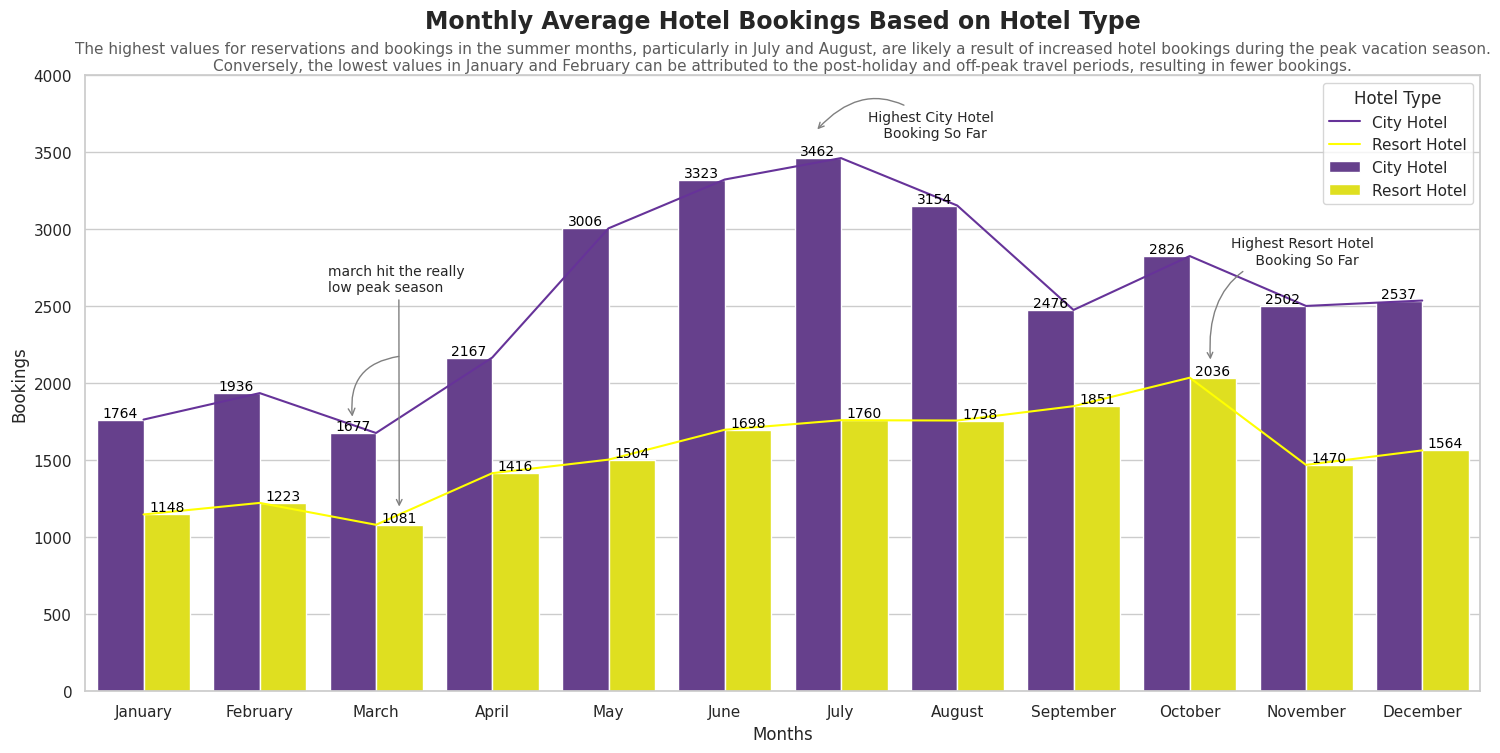

In [ ]:
# Create a custom color palette with darker shades
custom_palette = ["rebeccapurple", "yellow"]

# Create a lineplot for "Average Booking per Year" with the custom palette
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))
lineplot = sns.lineplot(data=monthly_hotels_filtered, x="Arrival Month", y="Average Booking per Year", hue="Hotel Type", palette=custom_palette)
barplot = sns.barplot(data=monthly_hotels_filtered, x="Arrival Month", y="Average Booking per Year", hue="Hotel Type", palette=custom_palette)

# Add labels for the values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title("Monthly Average Hotel Bookings Based on Hotel Type", weight = 'bold', fontsize= 17, pad= 34)
plt.xlabel("Months")
plt.ylabel("Bookings")
plt.legend(title="Hotel Type")
ax.set_ylim(0, 4000)
plt.xticks(rotation=0)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """
The highest values for reservations and bookings in the summer months, particularly in July and August, are likely a result of increased hotel bookings during the peak vacation season.
Conversely, the lowest values in January and February can be attributed to the post-holiday and off-peak travel periods, resulting in fewer bookings.
"""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)

# Annotate the "March" data point with an arrow
ax.annotate("",
            xy=(1.80, 1765), xycoords='data',
            xytext=(2.22, 1677 + 500), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.5", color='gray'))

ax.annotate("march hit the really \nlow peak season", fontsize = 10,
            xy=(2.20, 1181), xycoords='data',
            xytext=(1.59, 2600), textcoords='data',
            arrowprops=dict(arrowstyle="->",  color='gray'))

ax.annotate("Highest City Hotel \n Booking So Far", fontsize = 10,
            xy=(5.78, 3635), xycoords='data', ha = 'center',
            xytext=(6.79, 3600), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.5",  color='gray'))

ax.annotate("Highest Resort Hotel \n Booking So Far", fontsize = 10,
            xy=(9.18, 2136), xycoords='data', ha = 'center',
            xytext=(9.99, 2777), textcoords='data',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.5",  color='gray'))


plt.show()

Assumptions:

* The highest values for reservations, cancellations, and bookings in the summer months, particularly from `April` to `August`, could be due to the peak vacation season when more tourists and travelers choose to book hotels.
* The lowest values in `January`, `February`, and `march` may be attributed to the post-holiday and off-peak travel periods, resulting in fewer bookings.
* `September` and `October` have three "Total Years" of data, which might be due to unique events or factors impacting hotel bookings during those months. Further investigation is needed to determine the cause of this data anomaly.

##Impact Analysis of Stay Duration⏰

###Creating the Stay Duration Column

In [ ]:
# Create a new column 'total_stay_duration' as the sum of weekend and weekday nights
df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

### Group the values from the Stay Duration column

In [ ]:
def calculate_stay_duration_group(total_stay_duration):
    if total_stay_duration <= 7:
        return "<= 1 Week"
    elif total_stay_duration <= 14:
        return "2 Weeks"
    elif total_stay_duration <= 21:
        return "3 Weeks"
    else:
        return ">= 4 Weeks"

# Apply the function to create a new column 'Stay Duration Group'
df['stay_duration_group'] = df['total_stay_duration'].apply(calculate_stay_duration_group)

In [ ]:
df['stay_duration_group'].value_counts()

<= 1 Week     81281
2 Weeks        4479
3 Weeks         237
>= 4 Weeks      132
Name: stay_duration_group, dtype: int64

In [ ]:
# Filter the DataFrame to include only "Accepted," "Canceled," and "No-Show" reservation statuses
filtered_df = df[df['reservation_status'].isin(['Check-Out', 'Canceled', 'No-Show'])]

# Combine "Canceled" and "No-Show" into a single "Canceled" category
filtered_df['reservation_status'] = filtered_df['reservation_status'].replace({'No-Show': 'Canceled'})

# Calculate the ratio of canceled bookings
agg_table = filtered_df[filtered_df['reservation_status'] == 'Canceled'].groupby(['hotel', 'stay_duration_group'])['total_stay_duration'].count() / filtered_df.groupby(['hotel', 'stay_duration_group'])['total_stay_duration'].count()

# Reset the index to make it a DataFrame
agg_table = agg_table.reset_index()

# Sort the DataFrame by the "stay_duration_group" column
agg_table = agg_table.sort_values(by="stay_duration_group")

# Rename the columns
agg_table.columns = ['Hotel Type', 'Stay Duration Category', 'Cancellation Ratio']


In [ ]:
# Define a custom sort order for "Stay Duration Category"
custom_order = ['<= 1 Week', '2 Weeks', '3 Weeks', '>= 4 Weeks']

# Convert the "Stay Duration Category" column to a Categorical data type with the custom sort order
agg_table['Stay Duration Category'] = pd.Categorical(agg_table['Stay Duration Category'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the "Stay Duration Category" column
agg_table = agg_table.sort_values(by="Stay Duration Category")

# Reset the index
agg_table = agg_table.reset_index(drop=True)

In [ ]:
agg_table

,Hotel Type,Stay Duration Category,Cancellation Ratio
0,City Hotel,<= 1 Week,0.296105
1,Resort Hotel,<= 1 Week,0.229866
2,City Hotel,2 Weeks,0.509747
3,Resort Hotel,2 Weeks,0.271937
4,City Hotel,3 Weeks,0.718447
5,Resort Hotel,3 Weeks,0.350746
6,City Hotel,>= 4 Weeks,0.750000
7,Resort Hotel,>= 4 Weeks,0.325000


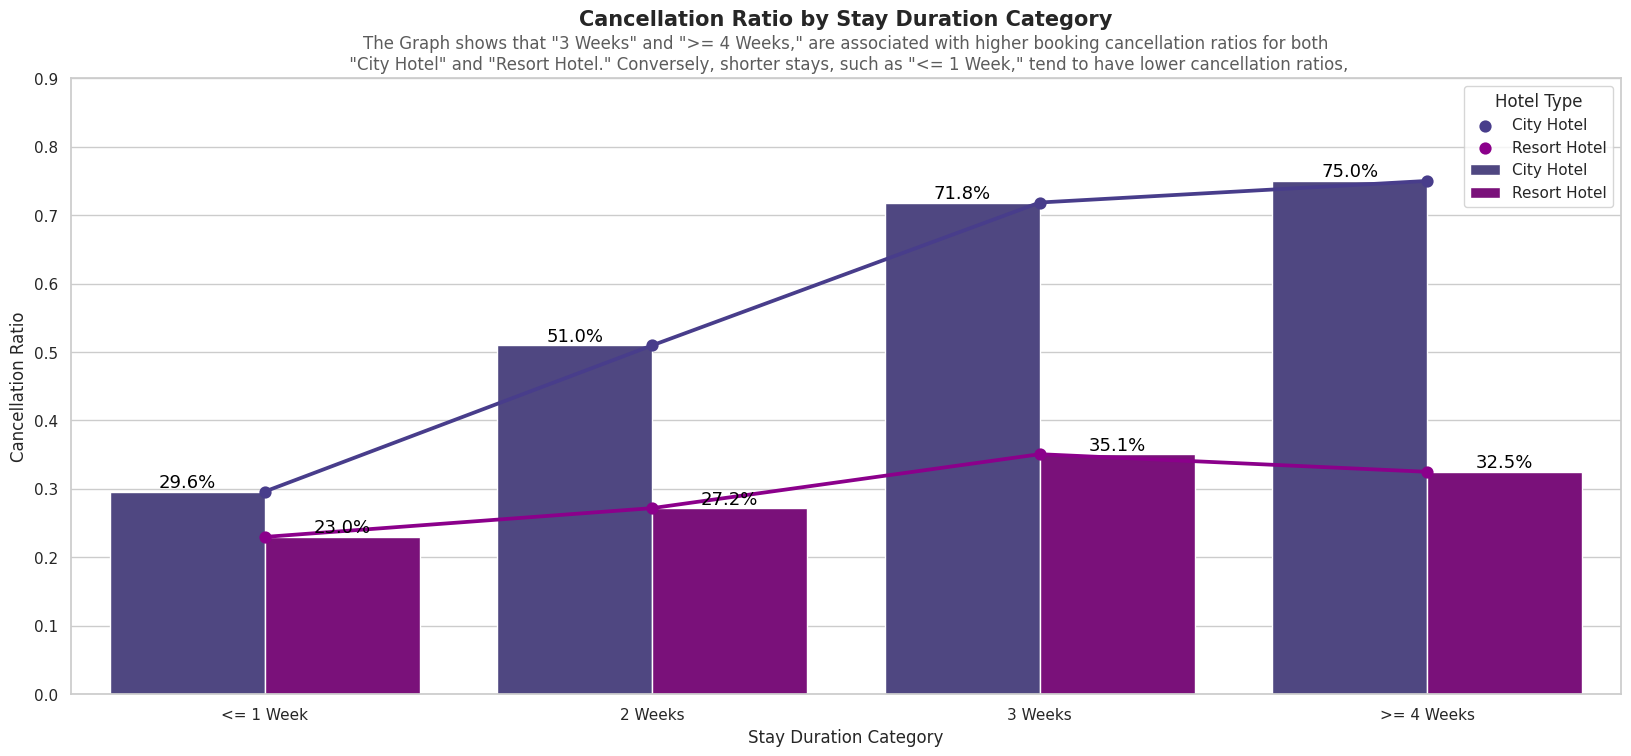

In [ ]:
from matplotlib.ticker import FuncFormatter

# Create a bar plot
fig, ax = plt.subplots(figsize=(20, 8))
barplot = sns.barplot(data=agg_table, x="Stay Duration Category", y="Cancellation Ratio", hue="Hotel Type", palette=["darkslateblue", "darkmagenta"])
barplot.set(ylim=(0, 0.9))  # Adjust the y-axis limits

# Create a point plot on the same diagram
pointplot = sns.pointplot(data=agg_table, x="Stay Duration Category", y="Cancellation Ratio", hue="Hotel Type" , ci=None, palette=["darkslateblue", "darkmagenta"])

# Add labels for the values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{100 * p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=13, color='black')

# Customize the plot
plt.title("Cancellation Ratio by Stay Duration Category", fontsize=15, weight='bold', pad=38)
plt.xlabel("Stay Duration Category")
plt.ylabel("Cancellation Ratio")
plt.legend(title="Hotel Type")
plt.xticks(rotation=False)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """
The Graph shows that "3 Weeks" and ">= 4 Weeks," are associated with higher booking cancellation ratios for both
 "City Hotel" and "Resort Hotel." Conversely, shorter stays, such as "<= 1 Week," tend to have lower cancellation ratios,
"""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center',fontsize = 12,  alpha = 0.75)

# Show the plot
plt.show()


The data presents the cancellation ratio for two types of hotels, "City Hotel" and "Resort Hotel," across different stay duration categories. The major summary of this result indicates that:

1. For "City Hotel":

 * The cancellation ratio is relatively higher for stays lasting "3 Weeks" and ">= 4 Weeks." This suggests that longer stays are more likely to be canceled.
 * Stays with a duration of "2 Weeks" also have a relatively high cancellation ratio.
 * Stays of "<= 1 Week" have a lower cancellation ratio, indicating that shorter stays are less likely to be canceled.

2. For "Resort Hotel":

 * Similar to the "City Hotel," longer stays ("3 Weeks" and ">= 4 Weeks") have a higher cancellation ratio.
 * Stays of "2 Weeks" also have a higher cancellation ratio compared to shorter stays.
 * Stays of "<= 1 Week" have the lowest cancellation ratio, suggesting that shorter stays are less prone to cancellations.

from my assumptions, there's some reasons on why this is happening:
* **Business vs. Business Leisure**: "City Hotel" may attract more business travelers who might have uncertain schedules, leading to a higher likelihood of cancellations. On the other hand, "Resort Hotel" guests may consist of more leisure travelers who plan their vacations more firmly.

* **Seasonal Influences**: Both hotel types experience a decrease in cancellation ratios as the length of stay increases. This pattern could be due to seasonal effects, as longer stays might coincide with peak vacation seasons when travelers are less likely to cancel their reservations.


Overall, this analysis reveals a pattern where longer stay durations are associated with higher cancellation ratios for both types of hotels. It also highlights that shorter stays, especially those lasting "<= 1 Week," have a lower likelihood of being canceled. The findings can be valuable for hotel management in understanding the relationship between stay duration and booking cancellations.

##Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates

###Creating the order interval category column

In [ ]:
# Define time intervals for order categorization (in days)
intervals = [0, 30, 120, 210, 300, 360, float("inf")]
interval_labels = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']

# Create a new column for order interval categorization
df['order_interval_category'] = pd.cut(df['lead_time'], bins=intervals, labels=interval_labels)

# Display the counts of each order interval category
category_counts = df['order_interval_category'].value_counts()

print("Total values on lead time cancellation:\n")
# Print a formatted result
for label, count in category_counts.items():
    print(f'{label:<15}: {count} Values')

Total values on lead time cancellation:

2 - 4 Months   : 29506 Values
<= 1 Month     : 28439 Values
5 - 7 Months   : 14527 Values
8 - 10 Months  : 5552 Values
11 - 12 Months : 1562 Values
> 12 Months    : 619 Values


### Aggregrate the cancellation rates from lead time

In [ ]:
# Filter the DataFrame to include only "Canceled" reservation status
canceled_df = df[df['reservation_status'] == 'Canceled']

# Group by hotel type and lead time interval and calculate the ratio of canceled bookings
cancellation_ratio = canceled_df.groupby(['hotel', 'order_interval_category'])['is_canceled'].count() / df.groupby(['hotel', 'order_interval_category'])['is_canceled'].count()

# Reset the index to make it a DataFrame
cancellation_ratio = cancellation_ratio.reset_index()

# Rename the columns
cancellation_ratio.columns = ['Hotel Type', 'Lead Time Interval', 'Cancellation Ratio']

In [ ]:
cancellation_ratio

,Hotel Type,Lead Time Interval,Cancellation Ratio
0,City Hotel,<= 1 Month,0.195706
1,City Hotel,2 - 4 Months,0.326167
2,City Hotel,5 - 7 Months,0.372612
3,City Hotel,8 - 10 Months,0.449462
4,City Hotel,11 - 12 Months,0.586402
5,City Hotel,> 12 Months,0.537634
6,Resort Hotel,<= 1 Month,0.130128
7,Resort Hotel,2 - 4 Months,0.299656
8,Resort Hotel,5 - 7 Months,0.314552
9,Resort Hotel,8 - 10 Months,0.330340


###Visualize the Lead Time Cancellation Ratio

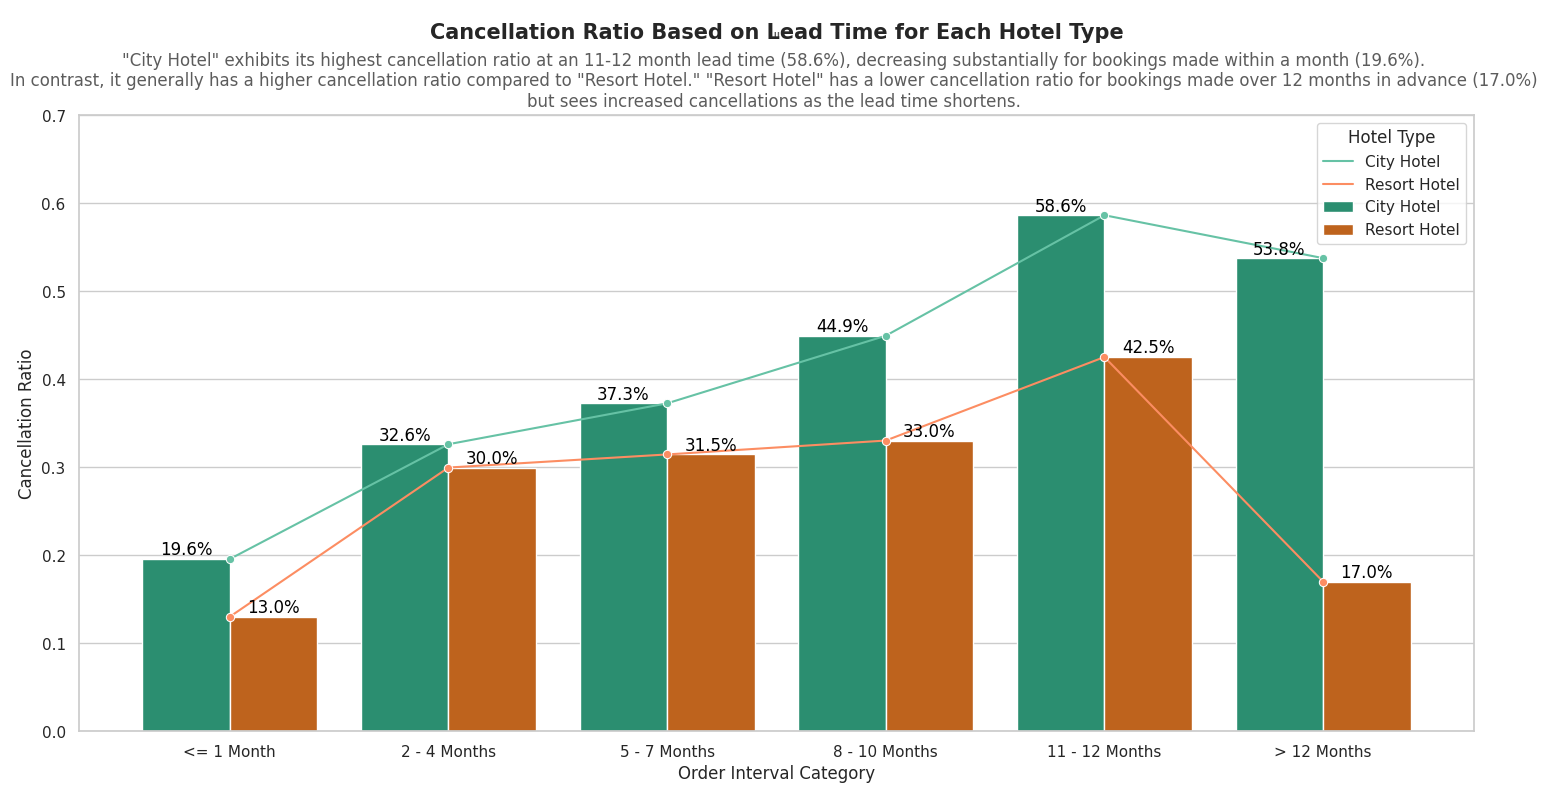

In [ ]:
# Group the data by hotel type and order interval category and calculate the cancellation ratio
cancellation_ratio = df[df['reservation_status'] == 'Canceled'].groupby(['hotel', 'order_interval_category'])['lead_time'].count() / df.groupby(['hotel', 'order_interval_category'])['lead_time'].count()

# Reset the index to make it a DataFrame
cancellation_ratio = cancellation_ratio.reset_index()

# Rename the columns
cancellation_ratio.columns = ['Hotel Type', 'Order Interval Category', 'Cancellation Ratio']

# Create a combined plot with bar and line plots
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(18, 8))
# Create a bar plot
barplot = sns.barplot(data=cancellation_ratio, x="Order Interval Category", y="Cancellation Ratio", hue="Hotel Type", palette="Dark2")
barplot.set(ylim=(0, 0.7))  # Adjust the y-axis limits

# Create a line plot
lineplot = sns.lineplot(data=cancellation_ratio, x="Order Interval Category", y="Cancellation Ratio", hue="Hotel Type", palette="Set2", marker="o")

# Add labels for the values on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{100 * p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12, color='black')


# Customize the plot
plt.title("Cancellation Ratio Based on Lead Time for Each Hotel Type", weight='bold', fontsize=15, pad=60)
plt.xlabel("Order Interval Category")
plt.ylabel("Cancellation Ratio")
plt.legend(title="Hotel Type", loc="upper right")
plt.xticks(rotation=False)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """
"
"City Hotel" exhibits its highest cancellation ratio at an 11-12 month lead time (58.6%), decreasing substantially for bookings made within a month (19.6%).
In contrast, it generally has a higher cancellation ratio compared to "Resort Hotel." "Resort Hotel" has a lower cancellation ratio for bookings made over 12 months in advance (17.0%)
but sees increased cancellations as the lead time shortens.
"""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center',fontsize = 12,  alpha = 0.75)

# Show the plot
plt.show()

1. **Insight from the plot**:

The data provides a clear understanding of the relationship between lead time (booking interval) and the cancellation ratio for two types of hotels, `"City Hotel"` and `"Resort Hotel."` Here are the main insights and summary of the results:

* Shorter Lead Time, Lower Cancellation Ratio:

 * Both hotel types show a consistent pattern. As the lead time decreases, the cancellation ratio also decreases.
 * For example, for `"City Hotel,"` the cancellation ratio is highest for bookings with a lead time of "11 - 12 Months" (58.6%), and it gradually decreases as lead time shortens. Bookings with a lead time of "<= 1 Month" have a much lower cancellation ratio (19.6%).

* Variations between Hotel Types:

 * The cancellation ratios differ between the two types of hotels.
`"City Hotel"` generally has a higher cancellation ratio across all lead time intervals compared to `"Resort Hotel."`
 * For `"Resort Hotel,"` the cancellation ratio is lowest for bookings with a lead time of "> 12 Months" (17.0%) and gradually increases as lead time decreases.

2. **Assumptions and Implications**:

 * Booking Confidence and Planning: The data suggests that guests booking well in advance, such as "11 - 12 Months" ahead, may not be as committed to their plans, leading to higher cancellation rates. Conversely, guests with "<= 1 Month" lead time may have more definite plans.

 * Business and Leisure: "City Hotel" may attract more business travelers who often plan trips closer to the travel date, resulting in a higher cancellation ratio. "Resort Hotel" guests may be more focused on leisure travel, planning ahead and showing a lower cancellation ratio.

 * Pricing and Policies: Different cancellation policies, pricing strategies, or market segments could contribute to variations in cancellation ratios between the two hotel types. Further analysis of these factors can help understand the reasons behind the trends.